# **What is a brain tumor?**
## A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. 

<img height=400 width=500 src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg" />


# **The Kinds of tumor :**

## 1- Glioma: Tumors from glial cells in the brain, including:

### Astrocytomas: From star-shaped astrocytes.
### Oligodendrogliomas: From oligodendrocytes.
### Ependymomas: From cells lining the brain's ventricles.

## 2- Meningioma: Tumors in the meninges (protective brain layers). Often slow-growing and usually benign.

## 3-No Tumor: Indicates no tumor detected in the imaging.

## 4-Pituitary Tumor: Tumors in the pituitary gland, affecting hormone production and causing symptoms related to hormone imbalance.

<img height=400 width=800 src="https://www.medrxiv.org/content/medrxiv/early/2023/10/05/2023.10.03.23296522/F1.medium.gif" />

# **Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Lib for preprocessing  
from PIL import Image
import itertools 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix , classification_report  
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Lib for model 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam , Adamax 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("Done")

2024-08-09 19:36:11.918079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 19:36:11.918195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 19:36:12.059508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Done


# **Preprocessing**

In [4]:
folder_training = "/kaggle/input/brain-tumor-mri-dataset/Training"
Path = []
Labels = []

#to get the path for each Img :

folders_path = os.listdir(folder_training)
for img in folders_path : 
    FolderPath = os.path.join(folder_training, img)
    FolderName = os.listdir(FolderPath)
    for path in FolderName :
        Images_path = os.path.join(FolderPath, path)
        
        Path.append(Images_path)
        Labels.append(img)

# to creat DataFrame        
Pseries = pd.Series(Path, name = "Img_Path")
Lseries = pd.Series(Labels, name = "Img_label")
df_train = pd.concat([Pseries, Lseries], axis=1)

In [5]:
df_train


,Img_Path,Img_label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [6]:
folder_test = "/kaggle/input/brain-tumor-mri-dataset/Testing"
Path = []
Labels = []

# To get the path for each image in the test set:

folders_path = os.listdir(folder_test)  # Use folder_test here
for img in folders_path: 
    FolderPath = os.path.join(folder_test, img)  # Use folder_test here
    FolderName = os.listdir(FolderPath)
    for path in FolderName:
        Images_path = os.path.join(FolderPath, path)
        
        Path.append(Images_path)
        Labels.append(img)

# To create DataFrame        
Pseries = pd.Series(Path, name = "Img_Path")
Lseries = pd.Series(Labels, name = "Img_label")
df_test = pd.concat([Pseries, Lseries], axis=1)


In [7]:
df_test

,Img_Path,Img_label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


In [8]:
valid_df, test_df = train_test_split(df_test, train_size=0.5, shuffle= True, random_state=42)

In [9]:
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_generator = tr_gen.flow_from_dataframe(
    df_train, 
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

valid_generator = ts_gen.flow_from_dataframe(
    valid_df, 
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb', 
    shuffle=True, 
    batch_size=batch_size
)

test_generator = ts_gen.flow_from_dataframe(
    test_df, 
    x_col='Img_Path',  # Use the correct column name for file paths
    y_col='Img_label', # Use the correct column name for labels
    target_size=img_size, 
    class_mode='categorical',
    color_mode='rgb', 
    shuffle=False, 
    batch_size=batch_size
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


## **Show sample of Data**

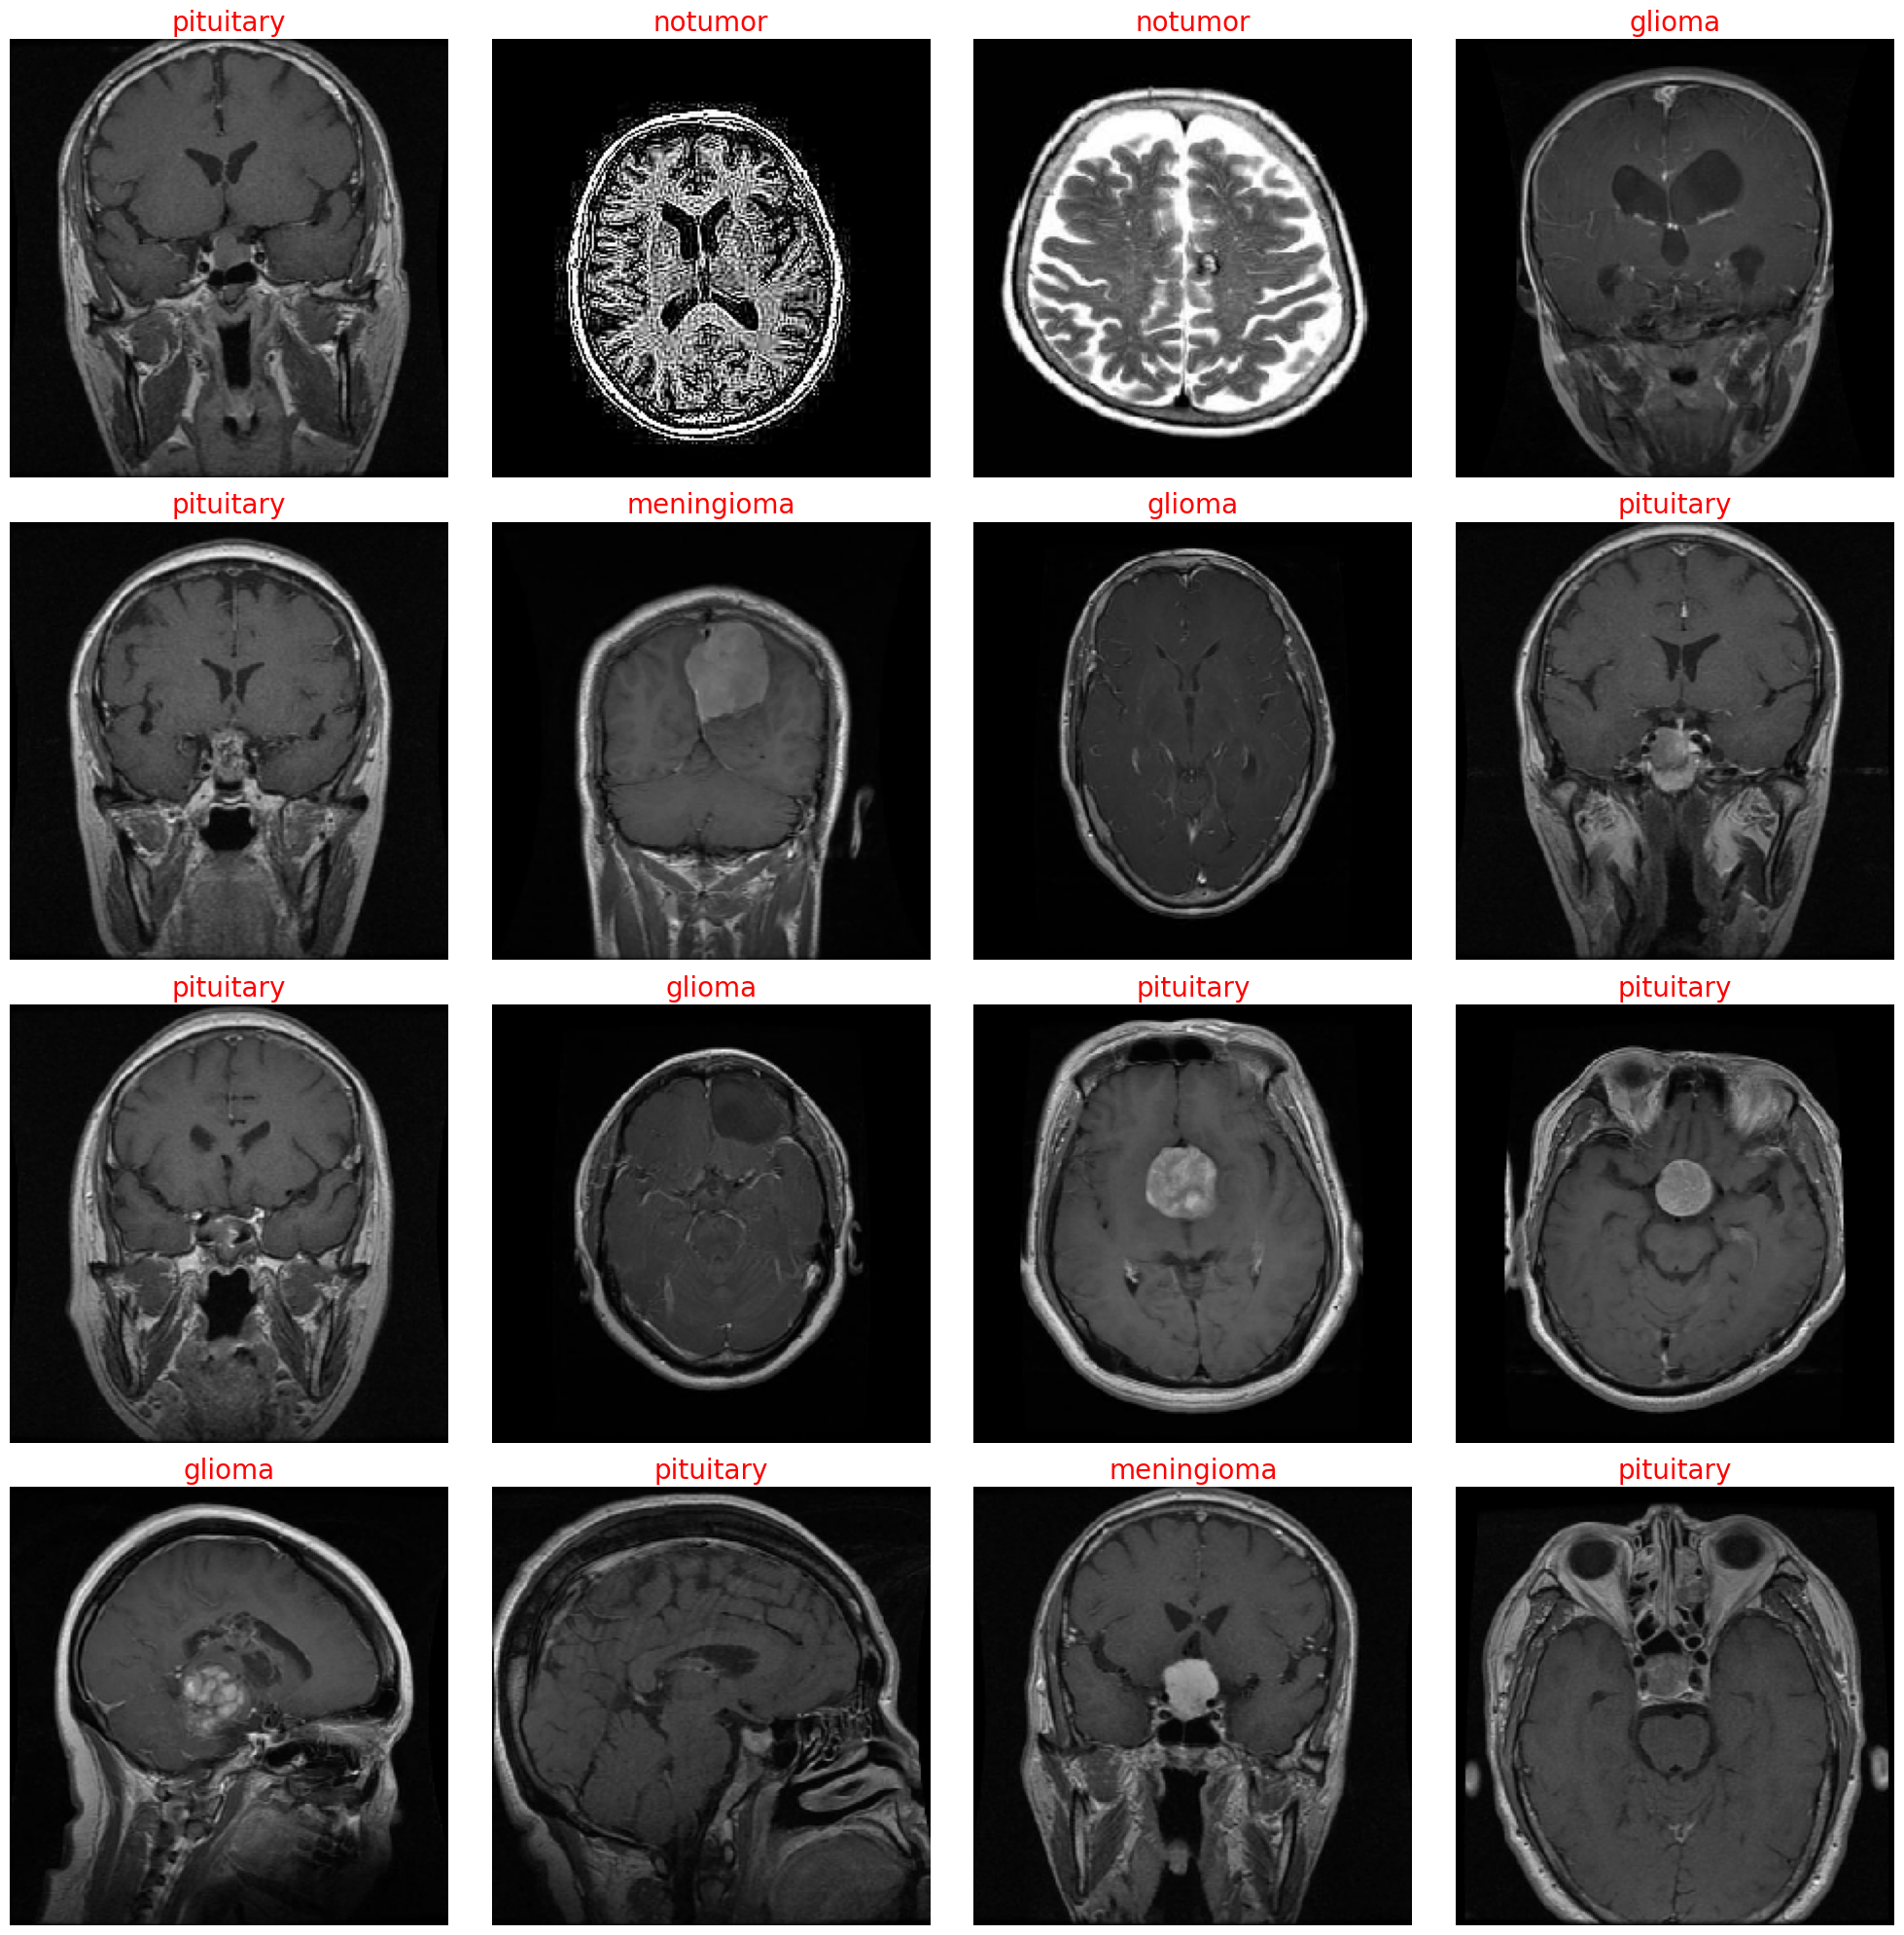

In [10]:
# Dictionary mapping class names to indices
gen_dict = train_generator.class_indices
# List of class names
classes = list(gen_dict.keys())

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Set up the figure size
plt.figure(figsize=(20, 20))

# Loop through the first 20 images in the batch
for i in range(16):
    plt.subplot(4, 4, i + 1)
    
    # Normalize image pixel values to [0, 1] range
    image = images[i] / 255.0
    
    # Display the image
    plt.imshow(image)
    
    # Get the class index and class name
    index = np.argmax(labels[i])  # Get image index
    class_name = classes[index]   # Get class of image
    
    # Set the title with class name
    plt.title(class_name, color='red', fontsize=20)
    plt.axis('off')

# Adjust layout for better spacing between plots
plt.tight_layout()
# Display the plot
plt.show()

## **The Structure of Model**

In [11]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_generator.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,180 (80.70 MB)

 Trainable params: 21,154,180 (80.70 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
epochs = 12   # number of all epochs in training

history = model.fit(train_generator, epochs= epochs, verbose= 1, validation_data= valid_generator, shuffle= False)

Epoch 1/12


2024-08-09 19:36:40.275164: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-08-09 19:36:40.275218: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-08-09 19:36:40.275228: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-08-09 19:36:40.275236: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-08-09 19:36:40.275244: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-08-09 19:36:40.275252: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-08-09 19:36:40.275260: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-08-09 19:36:40.275268: E external/local_xla/xla

  1/357 ━━━━━━━━━━━━━━━━━━━━ 2:31:37 26s/step - accuracy: 0.1250 - loss: 1.5986

I0000 00:00:1723232220.271583      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723232220.296436      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.4799 - loss: 42.2537

W0000 00:00:1723232258.766375      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-08-09 19:37:42.517663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.00564, expected 3.36194
2024-08-09 19:37:42.517718: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.21235, expected 4.56865
2024-08-09 19:37:42.517732: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 5.39965, expected 4.75595
2024-08-09 19:37:42.517745: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.25668, expected 4.61298
2024-08-09 19:37:42.517764: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.55266, expected 2.90896
2024-08-09 19:37:42.517775: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 4.84224, expected 4.19854
2024-08-09 19:37:42.517785: E external/local_xla/xla/service/

357/357 ━━━━━━━━━━━━━━━━━━━━ 75s 139ms/step - accuracy: 0.4803 - loss: 42.1592 - val_accuracy: 0.7206 - val_loss: 0.6971
Epoch 2/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.8327 - loss: 0.4726 - val_accuracy: 0.8214 - val_loss: 0.4401
Epoch 3/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.8970 - loss: 0.3000 - val_accuracy: 0.9053 - val_loss: 0.2889
Epoch 4/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9276 - loss: 0.2077 - val_accuracy: 0.9099 - val_loss: 0.2090
Epoch 5/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9446 - loss: 0.1511 - val_accuracy: 0.9435 - val_loss: 0.1675
Epoch 6/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9640 - loss: 0.1079 - val_accuracy: 0.9359 - val_loss: 0.1819
Epoch 7/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9720 - loss: 0.0859 - val_accuracy: 0.9527 - val_loss: 0.1195
Epoch 8/12
357/357 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9835 - loss: 0.0543 - va

## **Check the loss on graph**

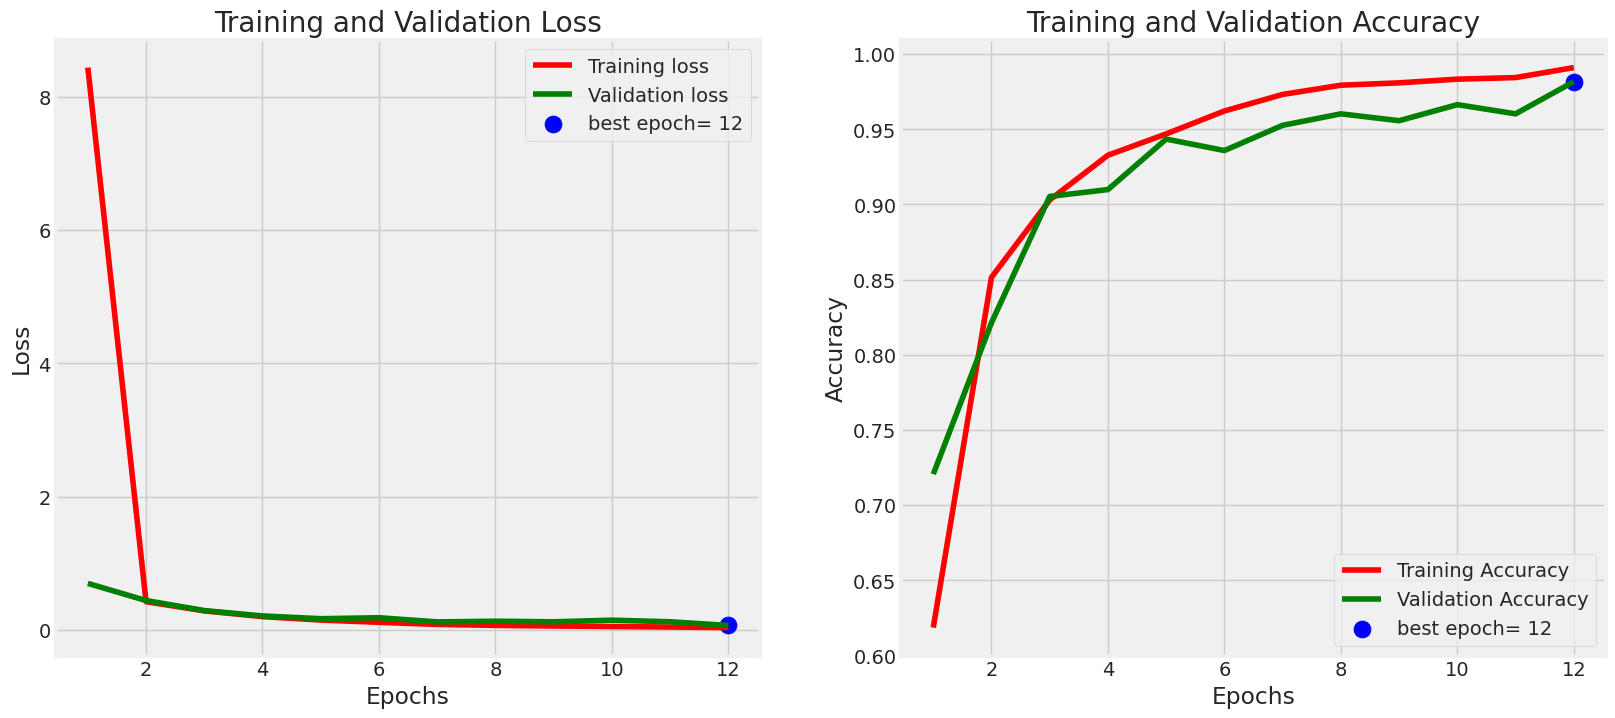

In [13]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
train_score = model.evaluate(train_generator, verbose= 1)
valid_score = model.evaluate(valid_generator, verbose= 1)
test_score = model.evaluate(test_generator, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.9973 - loss: 0.0079
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9835 - loss: 0.0507
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9631 - loss: 0.1607
Train Loss:  0.00703364796936512
Train Accuracy:  0.9984243512153625
--------------------
Validation Loss:  0.06605631113052368
Validation Accuracy:  0.981679379940033
--------------------
Test Loss:  0.15862657129764557
Test Accuracy:  0.9664633870124817


In [15]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

 7/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step

W0000 00:00:1723232721.443082      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


## **Confusion matrix for the test datat** 

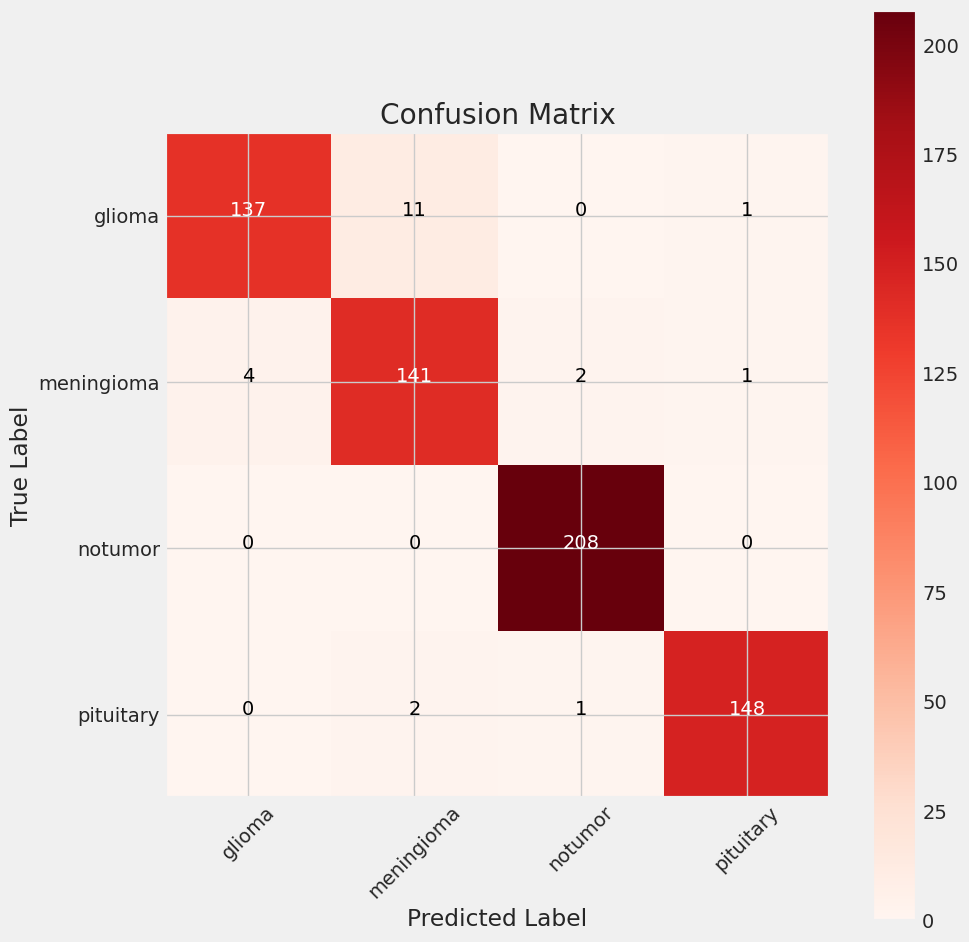

In [16]:
# Generate the class labels
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap='Reds')  # Use red colormap
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [17]:
print(classification_report(test_generator.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.97      0.92      0.94       149
  meningioma       0.92      0.95      0.93       148
     notumor       0.99      1.00      0.99       208
   pituitary       0.99      0.98      0.98       151

    accuracy                           0.97       656
   macro avg       0.96      0.96      0.96       656
weighted avg       0.97      0.97      0.97       656



In [18]:
#Save the model
model.save('Brain Tumors Classifier.h5')

## **Try the Model**

In [19]:
# Load the model
loaded_model = tf.keras.models.load_model('/kaggle/working/Brain Tumors Classifier.h5', compile=False)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Image path
image_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-noTr_0004.jpg'
image = Image.open(image_path)

# Preprocess the image before prediction
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Print the predicted class
predicted_class = class_labels[np.argmax(predictions)]
print(predicted_class)

2024-08-09 19:45:29.489249: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.42855, expected 3.64542
2024-08-09 19:45:29.489311: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.87036, expected 5.08723
2024-08-09 19:45:29.489321: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.04003, expected 5.2569
2024-08-09 19:45:29.489329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.22034, expected 5.43722
2024-08-09 19:45:29.489336: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 4.90026, expected 4.11714
2024-08-09 19:45:29.489344: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.21068, expected 4.42756
2024-08-09 19:45:29.489353: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.92061, expected 5.13748
2024-08-09 19:45:29.489361: E external/local_xla/xla/ser

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
No Tumor
